# LIBRERIAS Y DEPENDENCIAS

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

___________________

# EDA PRELIMINAR

# business.pkl

In [2]:
yelp_business_pkl = pd.read_pickle('../../Data/business.pkl')

In [3]:
yelp_business_pkl.head(7)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,PA,63144,38.627695,-90.340465,2.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Caracteristicas // df.shape // df.columns

In [4]:
yelp_business_pkl.shape

(150346, 28)

In [5]:
yelp_business_pkl.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

## Conteo String vacios

In [6]:
yelp_business_pkl.apply(lambda x: (x == "").sum())

business_id        0
name               0
address         5127
city               0
state              0
postal_code       73
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes         0
categories         0
hours              0
business_id        0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes         0
categories         0
hours              0
dtype: int64

OBS: Posiblemente address y postal_code contiene string vacios o "" en algunas filas

## Analisis Duplicados

### - df.duplicated() lanza este error (TypeError: unhasable type: 'dict') ya que hay columnas que contienen diccionarios. Asi que se procede a identificar dichas columnas

In [7]:
# Identificar las columnas que contienen diccionarios
columns_with_dicts = yelp_business_pkl.applymap(lambda x: isinstance(x, dict)).any()

# Filtrar los nombres de las columnas que contienen diccionarios
columns_with_dicts = columns_with_dicts[columns_with_dicts].index.tolist()

# Mostrar los nombres de las columnas que contienen diccionarios
print(f"Columnas que contienen diccionarios: {columns_with_dicts}")


Columnas que contienen diccionarios: ['attributes', 'hours', 'attributes', 'hours']


In [8]:
# DESPLEGAR EL CONTENIDO TOTAL DE LAS FILAS
pd.set_option('display.max_colwidth', None)

In [9]:
# VER INDEX 3 COLUMNA attributes(repetida en dataset) - informacion secundaria de caracteristicas en True o False
yelp_business_pkl[columns_with_dicts]['attributes'].iloc[3]

attributes    {'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': 'u'free'', 'Alcohol': 'u'none'', 'Caters': 'True'}
attributes                                                                                                                                                                                                                                                                                                                                                                                          NaN
attributes    {'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}

In [10]:
# VER INDEX 3 COLUMNA hours(repetida en dataset) - horarios de apertura
yelp_business_pkl[columns_with_dicts]['hours'].iloc[3]

hours    {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0', 'Thursday': '7:0-20:0', 'Friday': '7:0-21:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0'}
hours                                                                                                                                                                   NaN
hours    {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0', 'Thursday': '7:0-20:0', 'Friday': '7:0-21:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0'}
hours                                                                                                                                                                   NaN
Name: 3, dtype: object

In [11]:
yelp_business_pkl[columns_with_dicts]['attributes']

,attributes,attributes,attributes,attributes
0,{'ByAppointmentOnly': 'True'},NaN,{'ByAppointmentOnly': 'True'},NaN
1,{'BusinessAcceptsCreditCards': 'True'},NaN,{'BusinessAcceptsCreditCards': 'True'},NaN
2,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'CoatCheck': 'False', 'RestaurantsTakeOut': 'False', 'RestaurantsDelivery': 'False', 'Caters': 'False', 'WiFi': 'u'no'', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'WheelchairAccessible': 'True', 'HappyHour': 'False', 'OutdoorSeating': 'False', 'HasTV': 'False', 'RestaurantsReservations': 'False', 'DogsAllowed': 'False', 'ByAppointmentOnly': 'False'}",NaN,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'CoatCheck': 'False', 'RestaurantsTakeOut': 'False', 'RestaurantsDelivery': 'False', 'Caters': 'False', 'WiFi': 'u'no'', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'WheelchairAccessible': 'True', 'HappyHour': 'False', 'OutdoorSeating': 'False', 'HasTV': 'False', 'RestaurantsReservations': 'False', 'DogsAllowed': 'False', 'ByAppointmentOnly': 'False'}",NaN
3,"{'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': 'u'free'', 'Alcohol': 'u'none'', 'Caters': 'True'}",NaN,"{'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': 'u'free'', 'Alcohol': 'u'none'', 'Caters': 'True'}",NaN
4,"{'BusinessAcceptsCreditCards': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': '{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}', 'BikeParking': 'True', 'GoodForKids': 'True', 'Caters': 'False'}",NaN,"{'BusinessAcceptsCreditCards': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': '{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}', 'BikeParking': 'True', 'GoodForKids': 'True', 'Caters': 'False'}",NaN
...,...,...,...,...
150341,"{'ByAppointmentOnly': 'False', 'RestaurantsPriceRange2': '3'}",NaN,"{'ByAppointmentOnly': 'False', 'RestaurantsPriceRange2': '3'}",NaN
150342,"{'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'BikeParking': 'True', 'WiFi': 'u'no''}",NaN,"{'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'BikeParking': 'True', 'WiFi': 'u'no''}",NaN
150343,"{'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True'}",NaN,"{'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True'}",NaN
150344,"{'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'BikeParking': 'True', 'RestaurantsPriceRange2': '4', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'None', 'RestaurantsDelivery': 'None'}",NaN,"{'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'BikeParking': 'True', 'RestaurantsPriceRange2': '4', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsTakeOut': 'None', 'RestaurantsDelivery': 'None'}",NaN


OBS: Columnas attributes y hours pueden ser info secundaria

### - Eliminacion de columnas repetidas

In [12]:
# Identificar las columnas que están duplicadas
# Eliminar las columnas duplicadas y quedarnos con una sola copia de cada una
yelp_business_pkl = yelp_business_pkl.loc[:, ~yelp_business_pkl.columns.duplicated()]

# Verificar las columnas después de eliminar duplicadas
print("Columnas después de eliminar duplicados:")
print(yelp_business_pkl.columns)


Columnas después de eliminar duplicados:
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


### - Eliminacion de columnas tipo diccionario attributes y hours

In [13]:
yelp_business_pkl.drop(columns=['attributes','hours'],inplace= True)

## Conteo Duplicados

In [14]:
# Duplicados con respecto al dataset global (columnas y filas)
yelp_business_pkl.duplicated().sum()

0

In [15]:
# Analizar con respecto a columnas
for col in yelp_business_pkl:
    num_duplicados = yelp_business_pkl[col].duplicated().sum()
    print(f"Número de duplicados en la columna '{col}': {num_duplicados}")

Número de duplicados en la columna 'business_id': 0
Número de duplicados en la columna 'name': 36229
Número de duplicados en la columna 'address': 27502
Número de duplicados en la columna 'city': 148930
Número de duplicados en la columna 'state': 150318
Número de duplicados en la columna 'postal_code': 146984
Número de duplicados en la columna 'latitude': 14753
Número de duplicados en la columna 'longitude': 18428
Número de duplicados en la columna 'stars': 150337
Número de duplicados en la columna 'review_count': 149188
Número de duplicados en la columna 'is_open': 150344
Número de duplicados en la columna 'categories': 67185


## Conteo Nulos

In [16]:
yelp_business_pkl.isnull().sum()

business_id       0
name              0
address           0
city              0
state             3
postal_code       0
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
categories      103
dtype: int64

In [17]:
# eliminacion de 103 Nan categorias
# Comparar los datasets yelp - google / categorias 

In [18]:
states= pd.DataFrame(yelp_business_pkl['state'].value_counts())

In [19]:
states.head(100)

,count
state,
PA,34039
FL,26329
TN,12056
IN,11246
MO,10913
LA,9924
AZ,9912
NJ,8536
NV,7715


In [20]:
cities= pd.DataFrame(yelp_business_pkl['city'].value_counts())

In [21]:
cities.head(50)

,count
city,
Philadelphia,14569
Tucson,9250
Tampa,9050
Indianapolis,7540
Nashville,6971
New Orleans,6209
Reno,5935
Edmonton,5054
Saint Louis,4827


### - Eliminacion de nulos en columnas relevantes (REVISAR)

In [22]:
yelp_business_pkl.dropna(inplace=True)

In [23]:
yelp_business_pkl.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
categories      0
dtype: int64

## OUTLIERS

__________________________________________________________________________

## Columna stars

In [24]:
# Verificar si hay calificaciones fuera del rango normal (1-5)
outliers_stars = yelp_business_pkl[(yelp_business_pkl['stars'] < 1) | (yelp_business_pkl['stars'] > 5)]
outliers_stars


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories


NO HAY VALORES ATIPICOS (MENOR QUE 1 O MAYOR A 5) EN STAR 

____________________________________

## Columna categories

In [25]:
# Ver cuántas categorías tiene cada negocio 
yelp_business_pkl['num_categories'] = yelp_business_pkl['categories'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

# Detectar outliers en la cantidad de categorías
outliers_categories = yelp_business_pkl[yelp_business_pkl['num_categories'] > 20]  # Por ejemplo, más de 20 categorías es inusual
outliers_categories.head(5)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,num_categories
3088,kdboJGRQZXuKYLIFMvsoJw,Boise Auto Repair Mobile Tech Auto Repair,"1650 W Targee St, Ste 5104",Boise,FL,83705,43.583617,-116.202401,3.5,15,1,"Hawaiian, Car Stereo Installation, Auto Detailing, Trailer Repair, Parking, Local Services, Self Storage, RV Repair, Smog Check Stations, Auto Repair, Oil Change Stations, Counseling & Mental Health, Transmission Repair, Health & Medical, Body Shops, Windshield Installation & Repair, Shopping, Auto Glass Services, Restaurants, Automotive, Tires, Roadside Assistance, Battery Stores",23
20860,6Z_wgNTh5HJ7NhFghVe2vA,Nashville FlyBoard,4001 Bell Rd,Nashville,LA,37214,36.163927,-86.600881,5.0,5,1,"Hotels & Travel, Party & Event Planning, Boating, Fitness & Instruction, Sporting Goods, Lakes, Jet Skis, Amusement Parks, Parks, Active Life, Hot Air Balloons, Sports Clubs, Tours, Arts & Entertainment, Party Supplies, Shopping, Party Equipment Rentals, Outdoor Gear, Vacation Rentals, Flyboarding, Event Planning & Services",21
57614,iOFbMitGdfU6i5xm4nZ8Ww,Blue Willow Restaurant & Gift Shop,2616 N Campbell Ave,Tucson,MO,85719,32.254413,-110.943515,4.0,625,1,"Cards & Stationery, Event Planning & Services, Food, Bakeries, Flowers & Gifts, Nightlife, Breakfast & Brunch, Cocktail Bars, Bars, Shopping, Vegetarian, Gift Shops, Cafes, Beer Bar, Mexican, Gluten-Free, Restaurants, Wine Bars, Arts & Crafts, American (Traditional), American (New), Souvenir Shops",22
68356,jd8ID239kuHBpuJ3_B30jQ,The Wellness Kitchenista,123 Virtual Ln,Virtual,FL,19428,40.082436,-75.300401,5.0,7,1,"Arts & Crafts, Cooking Classes, Medical Centers, Nutritionists, Health Coach, Personal Chefs, Alternative Medicine, Specialty Schools, Cooking Schools, Education, Event Planning & Services, Specialty Food, Food, Doctors, Shopping, Dietitians, Concierge Medicine, Weight Loss Centers, Naturopathic/Holistic, Vitamins & Supplements, Health & Medical",21
86433,mmlZz6ypFdgHROjt2AnSsw,Hi-Tech Intelligent Services,521 S Broad St,Philadelphia,PA,19147,39.943838,-75.165242,4.0,10,0,"TV Mounting, Shopping, Event Planning & Services, Handyman, Professional Services, Kitchen & Bath, Print Media, Carpet Cleaning, Advertising, Home Organization, Home & Garden, Videographers, Local Services, Mass Media, Marketing, Contractors, Home Services, IT Services & Computer Repair, Furniture Assembly, Junk Removal & Hauling, Office Cleaning, Home Cleaning, Plumbing, Graphic Design",24


In [26]:
print(f" NUMERO DE NEGOCIOS CON MAS DE 20 CATEGORIAS:   {outliers_categories['categories'].count()}")

 NUMERO DE NEGOCIOS CON MAS DE 20 CATEGORIAS:   12


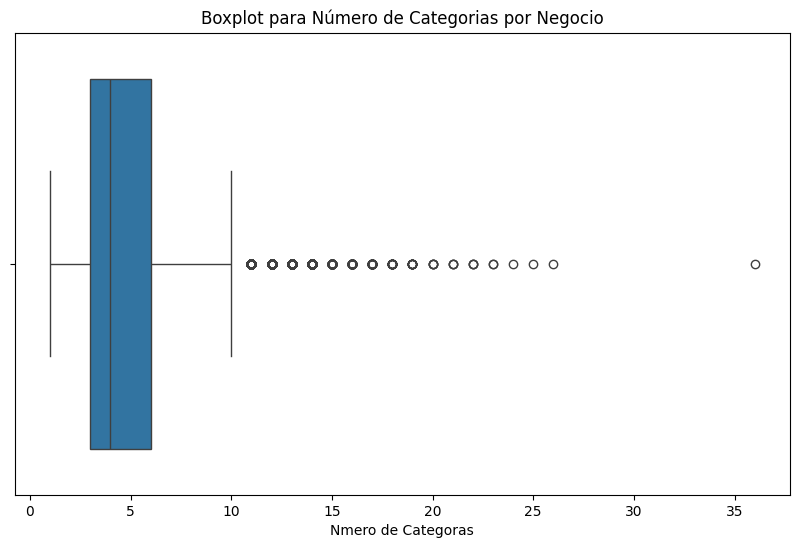

In [27]:
# BOXPLOT COLUMNA categories
plt.figure(figsize=(10, 6))
sns.boxplot(x=yelp_business_pkl['num_categories'])
plt.title('Boxplot para Número de Categorias por Negocio')
plt.xlabel('Nmero de Categoras')
plt.show()


__________________________

## Columna review_count

In [28]:
# Detectar outliers usando el método del IQR
Q1 = yelp_business_pkl['review_count'].quantile(0.25)
Q3 = yelp_business_pkl['review_count'].quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers_reviews = yelp_business_pkl[(yelp_business_pkl['review_count'] < lower_bound) | (yelp_business_pkl['review_count'] > upper_bound)]
outliers_reviews


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,num_categories
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"Food, Delis, Italian, Bakeries, Restaurants",5
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,IN,19106,39.953949,-75.143226,4.0,245,1,"Sushi Bars, Restaurants, Japanese",3
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,AZ,19147,39.943223,-75.162568,4.5,205,1,"Korean, Restaurants",2
23,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,AB,89502,39.476117,-119.789339,2.5,339,1,"Restaurants, Italian",2
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,"Restaurants, Japanese, Seafood",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150285,fWeWzB9STxcX40AgSEQVcw,Arizona-Sonora Desert Museum,2021 N Kinney Rd,Tucson,NJ,85743,32.243733,-111.166815,4.5,448,1,"Parks, Zoos, Active Life, Botanical Gardens, Museums, Arts & Entertainment",6
150290,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,PA,93105,34.440689,-119.739681,4.0,299,0,"Restaurants, Pizza, Food",3
150296,lCo7sEuxlfFeT-nAOR-sbA,Apple Store,3301 Veterans Memorial Blvd,Metairie,NV,70002,30.005648,-90.157396,3.0,142,1,"IT Services & Computer Repair, Mobile Phones, Computers, Local Services, Shopping, Electronics",6
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,PA,37201,36.163875,-86.776311,4.0,204,0,"Fondue, Beer, Wine & Spirits, Food, Restaurants",5


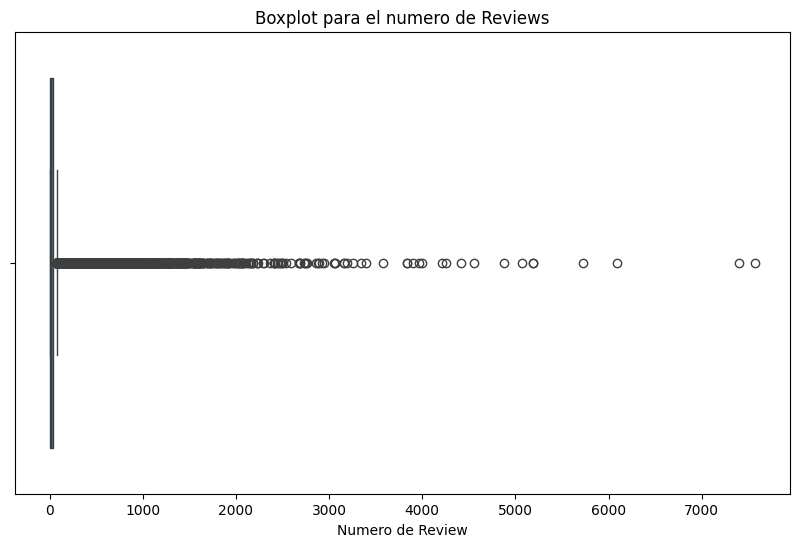

In [29]:
# GRAFICA BOXPLOT VISUALIZACION DE POSIBLES OUTLIERS EN reiview_count
plt.figure(figsize=(10, 6))
sns.boxplot(x=yelp_business_pkl['review_count'])
plt.title('Boxplot para el numero de Reviews')
plt.xlabel('Numero de Review')
plt.show()


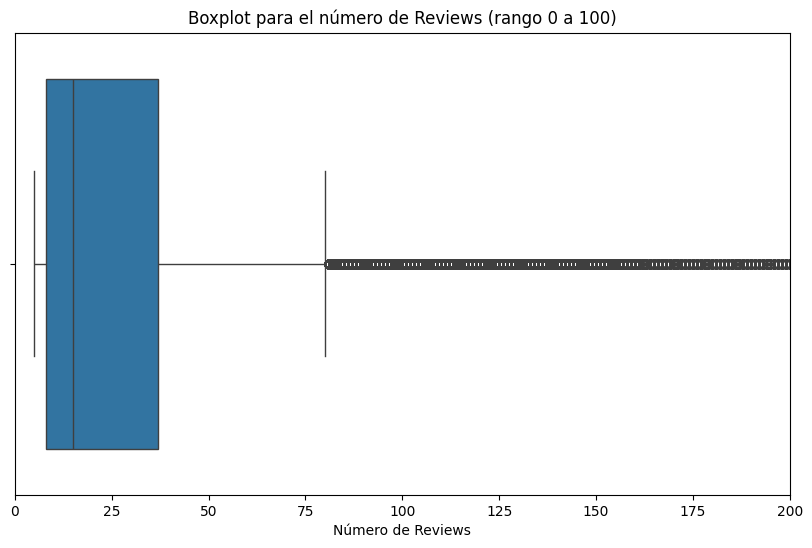

In [30]:
# GRAFICA BOX PLOT VISUALIZACION DE POSIBLES OUTLIERS EN UN RANGO DE 0 A 200
plt.figure(figsize=(10, 6))
sns.boxplot(x=yelp_business_pkl['review_count'])
plt.xlim(0, 200)
plt.title('Boxplot para el número de Reviews (rango 0 a 100)')
plt.xlabel('Número de Reviews')
plt.show()


In [31]:
states= pd.DataFrame(yelp_business_pkl['state'].value_counts())
states.head(40)

,count
state,
PA,34013
FL,26311
TN,12045
IN,11238
MO,10909
LA,9917
AZ,9907
NJ,8529
NV,7712


In [32]:
cities= pd.DataFrame(yelp_business_pkl['city'].value_counts())
cities.head(15)

,count
city,
Philadelphia,14560
Tucson,9243
Tampa,9042
Indianapolis,7537
Nashville,6969
New Orleans,6208
Reno,5929
Edmonton,5053
Saint Louis,4824


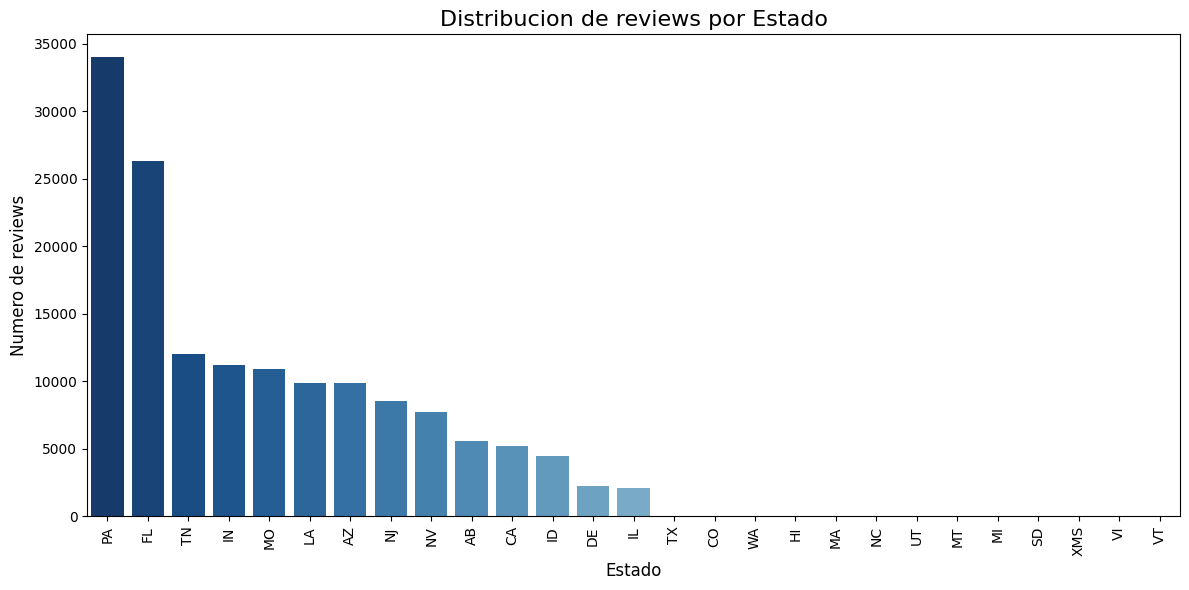

In [33]:
# DIAGRAMA DISTRIBUCION DE REVIEWS POR ESTADO

states = states.reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='count', data=states, palette="Blues_r")  # Reversed palette
plt.title('Distribucion de reviews por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Numero de reviews', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




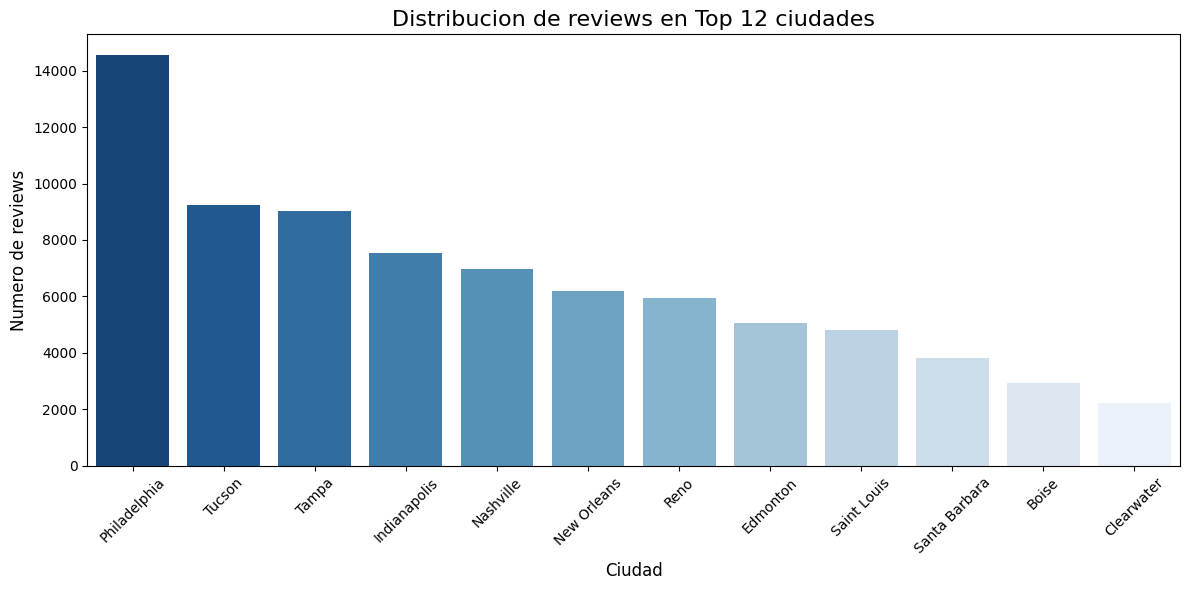

In [34]:
# DIAGRAMA DISTRIBUCION DE REVIEWS TOP 12 CIUDADES
top_12_cities = cities.head(12).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='count', data=top_12_cities, palette="Blues_r")
plt.title('Distribucion de reviews en Top 12 ciudades', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Numero de reviews', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
yelp_business_pkl[yelp_business_pkl['city']== 'Philadelphia'] 

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,num_categories
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries",5
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,IN,19106,39.953949,-75.143226,4.0,245,1,"Sushi Bars, Restaurants, Japanese",3
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,AZ,19147,39.943223,-75.162568,4.5,205,1,"Korean, Restaurants",2
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"Cocktail Bars, Bars, Italian, Nightlife, Restaurants",5
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"Pizza, Restaurants, Salad, Soup",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150320,wPAaAbFbq5wfLfW0gnYU7g,Intermix,1718 Walnut St,Philadelphia,FL,19103,39.95006,-75.170129,2.0,10,0,"Fashion, Shopping, Women's Clothing",3
150326,JDM7kiCEmeBc_5W-z6eZZw,2601 Parkway Apartments,2601 Pennsylvania Ave,Philadelphia,ID,19130,39.968806,-75.180608,3.0,6,1,"Real Estate, Apartments, Home Services",3
150329,9U1Igcpe954LoWZRmNc-zg,Hand & Stone Massage And Facial Spa,"1100 S Columbus Blvd, Ste 24",Philadelphia,PA,19147,39.932756,-75.144504,3.0,32,1,"Day Spas, Beauty & Spas, Skin Care, Massage",4
150334,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1",Philadelphia,AZ,19103,39.945966,-75.169666,4.5,39,1,"Health & Medical, Yoga, Shopping, Naturopathic/Holistic, Active Life, Meditation Centers, Doctors, Fitness & Instruction",8
